In [19]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

In [20]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1) # x0^2 + x1^2

In [21]:
def numerical_gradient_single_point(f, x, verbose=False): 
    h = 1e-4
    grad = np.zeros_like(x)
    if verbose:
        print('x.size={}'.format(x.size)) # (x0, x1) 을 입력으로 받음 --> 2
       
    for idx in range(x.size): #축별로 계산
        v_keep = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(v_keep) + h #n차원 입력 중 해당 차원으로만 h를 더하고
        fxh1 = f(x)
        if verbose:
            print(x, '-->', fxh1)
        
        # f(x-h) 계산
        x[idx] = float(v_keep) - h #n차원 입력 중 해당 차원으로만 h를 빼서
        fxh2 = f(x)
        if verbose:
            print(x, '-->', fxh2)
        
        grad[idx] = (fxh1 - fxh2) / (2*h) #n차원 방향의 차분을 구함 !
        x[idx] = v_keep # 값 복원
        
        if verbose:
            print('grad[{}]={}'.format(idx, grad[idx]))
            print()
    return grad

In [22]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return numerical_gradient_single_point(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient_single_point(f, x)
        
        return grad

In [23]:
def gradient_descent(f, init_x, lr =0.1, step_num= 10, return_history = False, verbose = False):
    x = init_x
    vx = np.zeros((step_num+1, 2)) # x의 궤적의 변화를 기록하기 위한 list 초기화
    vx[0] = x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        
        x -= lr * grad
        if verbose:
            print(x, grad)
            
        vx[i+1] = x # keep x in the history list
    
    if return_history:
        
        return x, vx
    else:
        return x

In [24]:
init_x = np.array([-3.0, 4.0])

In [25]:
#x_final = gradient_descent(function_2, init_x = init_x, lr = 0.1)

In [26]:
learning_rate = 0.1

In [38]:
learning_rate = 100

In [42]:
learning_rate = 0.001

In [43]:
x_final, x_hist = gradient_descent(function_2, init_x.copy(), lr = learning_rate, return_history = True, verbose=False)

최종값이 아래에 수렴함을 확인

In [44]:
x_final

array([-2.94053713,  3.92071617])

Text(0.5, 1.0, 'Learning rate = 0.1')

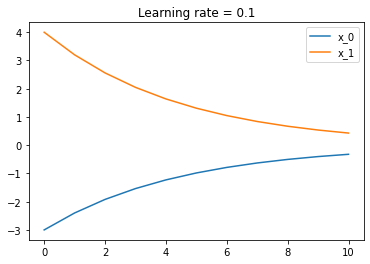

In [29]:
plt.plot(x_hist[:,0])
plt.plot(x_hist[:,1])
plt.legend(['x_0', 'x_1'])
plt.title('Learning rate = {}'.format(learning_rate))

Text(0.5, 1.0, 'Learning rate = 100')

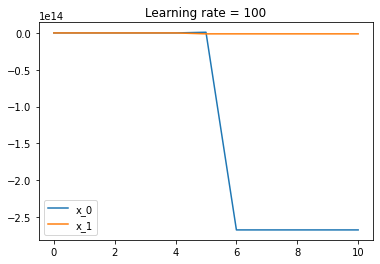

In [41]:
plt.plot(x_hist[:,0])
plt.plot(x_hist[:,1])
plt.legend(['x_0', 'x_1'])
plt.title('Learning rate = {}'.format(learning_rate))

Text(0.5, 1.0, 'Learning rate = 0.001')

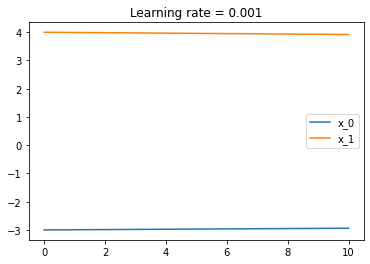

In [45]:
plt.plot(x_hist[:,0])
plt.plot(x_hist[:,1])
plt.legend(['x_0', 'x_1'])
plt.title('Learning rate = {}'.format(learning_rate))

100번까지 반복할 필요는 없을것 같다. Ir을 너무 크게 주거나 작게 주면 기울기 반영이 너무 적게 되거나 크게 되어서 원하는 값에 도달하기 힘들다.

생각해보기

In [30]:
init_x

array([-3.,  4.])

In [31]:
x0 = np.arange(-3, 4, 0.25) 
x1 = np.arange(-3, 4, 0.25)
X, Y = np.meshgrid(x0, x1)

nrows = X.shape[0]
ncols = X.shape[1]
Xf = X.flatten()
Yf = Y.flatten()
arr = np.array([Xf, Yf])
arr = arr.transpose()

print(Xf.shape,Yf.shape)
print(arr.shape, arr.ndim)
Z = function_2(arr)
Z = np.reshape(Z, (nrows,ncols))
print(X.shape, Y.shape, Z.shape)

(784,) (784,)
(784, 2) 2
(28, 28) (28, 28) (28, 28)


In [32]:
Z_hist = x_hist[:, 0]**2 + x_hist[:, 1]**2

Text(0.5, 0, 'z')

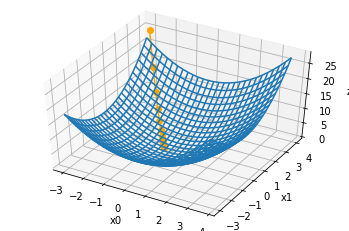

In [33]:
fig = plt.figure()
ax = plt.axes(projection = "3d")
ax.plot_wireframe(X, Y, Z)
ax.plot(x_hist[:, 0], x_hist[:, 1], Z_hist, 'o-', c='orange')
ax.view_init(elev=45, azim=300)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('z')
